### Exploratory Data Analysis

Take a deep look at attributes of data in order to get familiar with the data.

> Exploratory data analysis (EDA) is a very important step which takes place after feature engineering and acquiring data and it should be done before any modeling. 

* to use summary statistics and visualizations to better understand data, 
* find clues about the tendencies of the data, its quality and to formulate assumptions and the hypothesis of our analysis
* For data preprocessing to be successful, it is essential to have an overall picture of your data Basic statistical descriptions can be used to identify properties of the data and highlight which data values should be treated as **noise or outliers.** 

In [88]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np 
from scipy.stats import norm
import seaborn as sns

plt.rcParams["figure.figsize"] = (15, 8)
plt.rcParams["axes.titlesize"] = "large"

### Descriptive statistics
To describe data by using summary statistics

In [89]:
data = pd.read_csv("../../Result/Profile/CRC_HC_species.csv", index_col=False)
data.drop("Unnamed: 0", axis=1, inplace=True)
data = data.set_index("SampleID")
data.head()

,Group,Faecalibacterium_prausnitzii,Streptococcus_salivarius,Anaerostipes_hadrus,Bacteroides_stercoris,Collinsella_aerofaciens,Bifidobacterium_longum,Bacteroides_plebeius,Bacteroides_vulgatus,Dorea_longicatena,...,Clostridium_bolteae,Anaerotruncus_colihominis,Bacteroides_caccae,Mogibacterium_diversum,Clostridium_symbiosum,Lachnospira_pectinoschiza,Prevotella_copri,Bacteroides_massiliensis,Phascolarctobacterium_faecium,Butyricimonas_synergistica
SampleID,,,,,,,,,,,,,,,,,,,,,
SID31004,CRC,0.135886,0.110076,0.082626,0.052196,0.045848,0.039128,0.037739,0.037588,0.037230,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
SID31009,HC,0.051831,0.001390,0.075518,0.000000,0.036852,0.023695,0.000000,0.000078,0.044709,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
SID31021,HC,0.060921,0.001750,0.082622,0.000119,0.026752,0.041738,0.000000,0.005641,0.012771,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
SID31071,HC,0.129658,0.002624,0.030712,0.000653,0.079479,0.065415,0.000000,0.009723,0.052530,...,0.000000,0.0,0.000089,0.000009,0.000000,0.000000,0.000000,0.000000,0.0,0.0
SID31112,HC,0.004258,0.002728,0.049991,0.000000,0.196223,0.000000,0.000000,0.003655,0.000000,...,0.000021,0.0,0.002170,0.000088,0.000312,0.000097,0.000093,0.000081,0.0,0.0


In [68]:
data.describe()

,Faecalibacterium_prausnitzii,Streptococcus_salivarius,Anaerostipes_hadrus,Bacteroides_stercoris,Collinsella_aerofaciens,Bifidobacterium_longum,Bacteroides_plebeius,Bacteroides_vulgatus,Dorea_longicatena,Fusicatenibacter_saccharivorans,...,Clostridium_bolteae,Anaerotruncus_colihominis,Bacteroides_caccae,Mogibacterium_diversum,Clostridium_symbiosum,Lachnospira_pectinoschiza,Prevotella_copri,Bacteroides_massiliensis,Phascolarctobacterium_faecium,Butyricimonas_synergistica
count,1380.000000,1380.000000,1380.000000,1380.000000,1380.000000,1380.000000,1380.000000,1380.000000,1380.000000,1380.000000,...,1380.000000,1380.000000,1380.000000,1380.000000,1380.000000,1380.000000,1380.000000,1380.000000,1380.000000,1380.000000
mean,0.050530,0.005438,0.015608,0.021787,0.019118,0.015341,0.024041,0.068395,0.009911,0.012403,...,0.001177,0.000232,0.008136,0.000108,0.000712,0.008499,0.063381,0.003260,0.002236,0.000228
std,0.053586,0.016543,0.039791,0.052186,0.034218,0.039022,0.069699,0.097777,0.017130,0.022403,...,0.004147,0.000746,0.017190,0.000504,0.002431,0.023413,0.161428,0.008987,0.006300,0.000693
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010974,0.000103,0.000442,0.000000,0.000570,0.000070,0.000000,0.002713,0.000092,0.000916,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.035008,0.000627,0.003840,0.000139,0.008303,0.002907,0.000000,0.028736,0.003894,0.005330,...,0.000067,0.000000,0.001303,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.073871,0.003101,0.014622,0.015232,0.023271,0.013903,0.003168,0.092135,0.012550,0.014501,...,0.000582,0.000105,0.008687,0.000047,0.000257,0.005430,0.003299,0.001227,0.001044,0.000112
max,0.382641,0.196880,0.634424,0.488109,0.474462,0.429489,0.672219,0.798541,0.239900,0.295285,...,0.070532,0.011626,0.287922,0.008255,0.035483,0.287895,0.872431,0.096591,0.127919,0.012875


In [69]:
data.skew()

/disk/share/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Faecalibacterium_prausnitzii     2.102276
Streptococcus_salivarius         6.622351
Anaerostipes_hadrus              8.214040
Bacteroides_stercoris            3.899980
Collinsella_aerofaciens          5.209292
                                   ...   
Lachnospira_pectinoschiza        5.745918
Prevotella_copri                 2.811436
Bacteroides_massiliensis         4.532159
Phascolarctobacterium_faecium    8.291196
Butyricimonas_synergistica       7.504788
Length: 110, dtype: float64

In [57]:
pd.DataFrame(data.groupby("Group", axis=0).size(), columns=["# of observations"])

,# of observations
Group,
CRC,693
HC,687


### Unimodal Data Visualizations

* Histograms
* Density Plots
* Box and Whisker Plots

/disk/share/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Group', ylabel='count'>

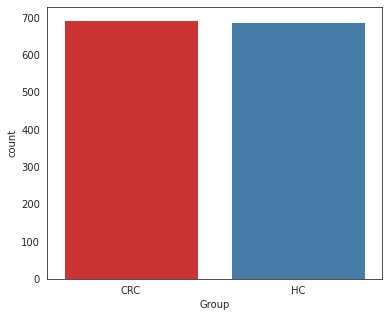

In [70]:
sns.set_style('white')
sns.set_context({"figure.figsize": (6, 5)})
sns.countplot(data['Group'], label='Count', palette="Set1")

#### Histograms

In [90]:
data['id'] = data.index.values
data_id_group = data.loc[:, ['id', 'Group']]
data_group = data.loc[:, ['Group']]
data_num = data.iloc[:, 1:17]

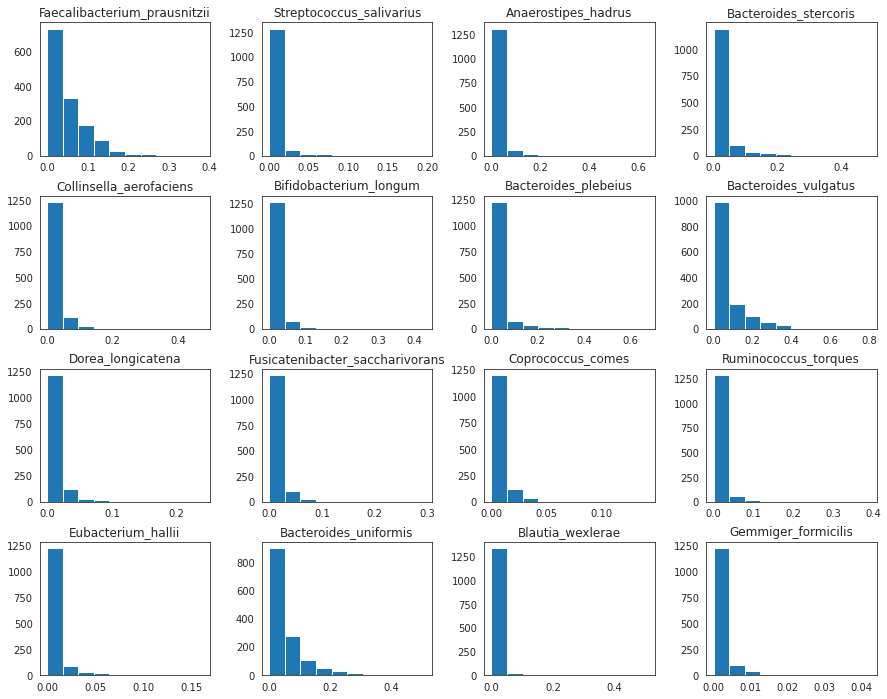

In [72]:
hist_num = data_num.hist(bins=10, figsize=(15, 12), grid=False)

<AxesSubplot:>

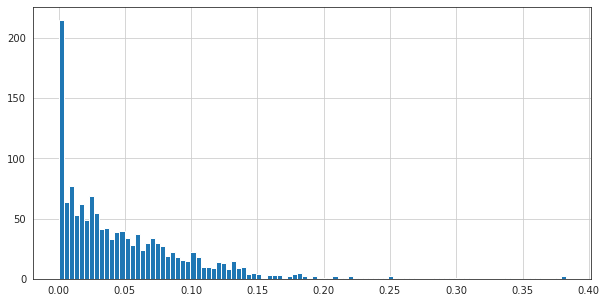

In [73]:
data_num['Faecalibacterium_prausnitzii'].hist(bins=100, figsize=(10, 5))

#### Density

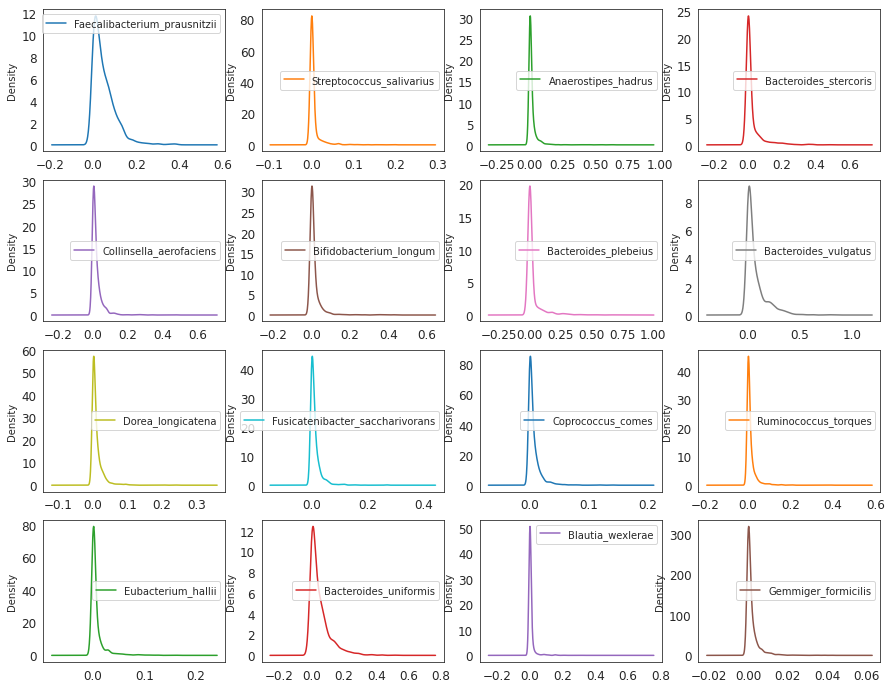

In [74]:
plt = data_num.plot(kind='density',
                   subplots=True,
                   layout=(4, 4),
                   sharex=False,
                   sharey=False,
                   fontsize=12,
                   figsize=(15, 12))

#### Boxplot 

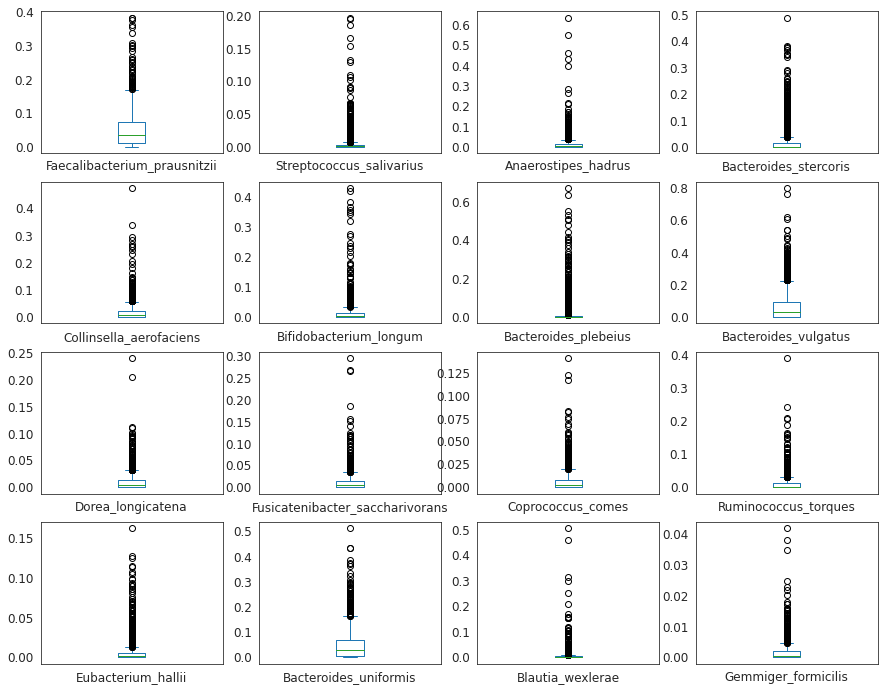

In [75]:
plt = data_num.plot(kind='box',
                   subplots=True,
                   layout=(4, 4),
                   sharex=False,
                   sharey=False,
                   fontsize=12,
                   figsize=(15, 12))

#### 2.4 Multimodal Data Visualizations
* Scatter plots
* Correlation matrix

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

<AxesSubplot:title={'center':'Bacterial Species Feature Correlation'}>

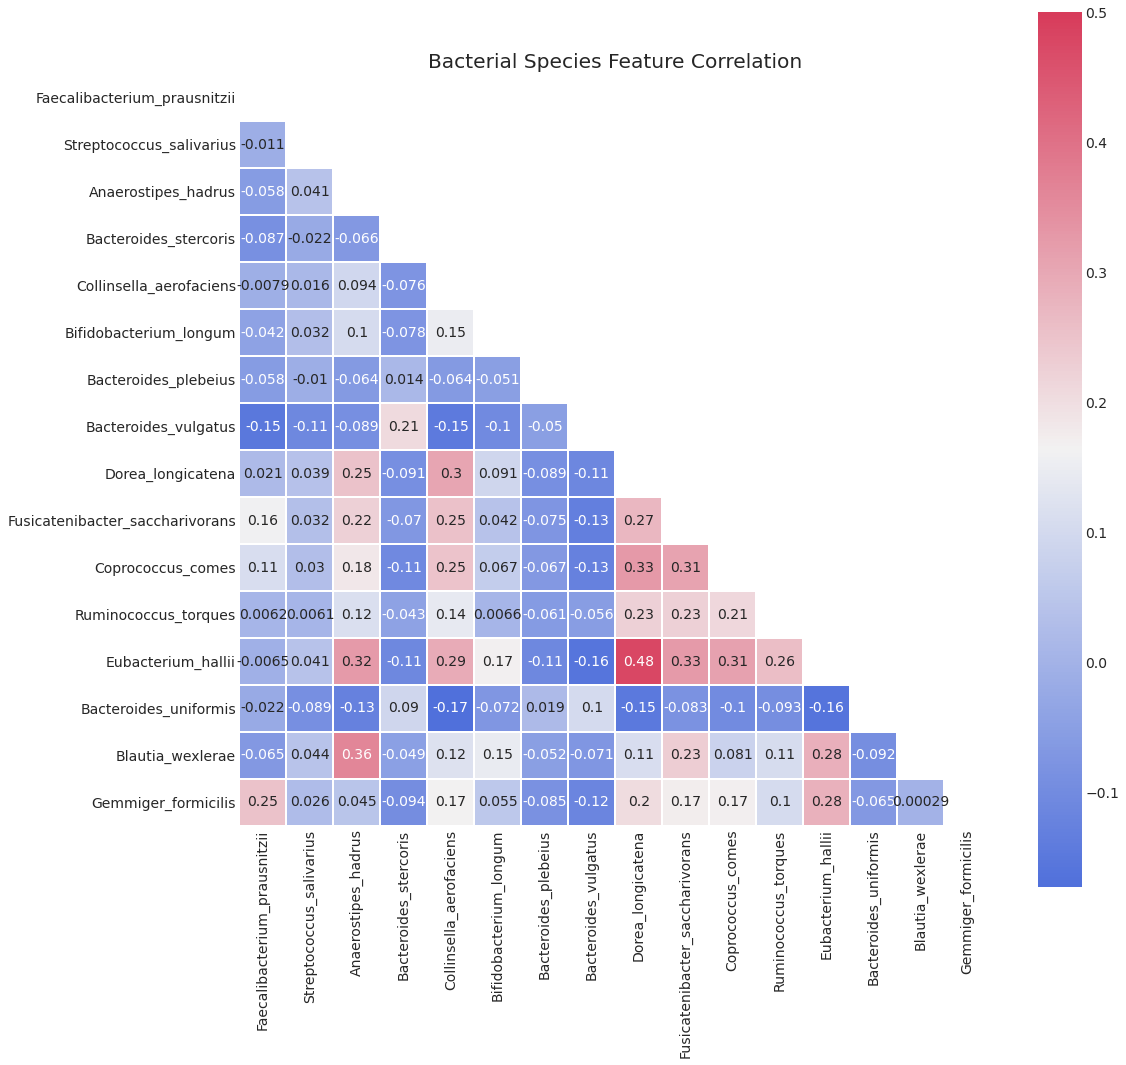

In [102]:
plt.style.use('fivethirtyeight')
sns.set_style('white')

corr = data_num.corr()

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

data, ax = plt.subplots(figsize=(15, 15))
plt.title("Bacterial Species Feature Correlation")
color_cmap = sns.diverging_palette(260, 5, as_cmap=True)
sns.heatmap(corr, 
            vmax=.5,
            square='square',
            cmap=color_cmap,
            mask=mask,
            ax=ax,
            annot=True,
            fmt='.2g',
            linewidths=2)

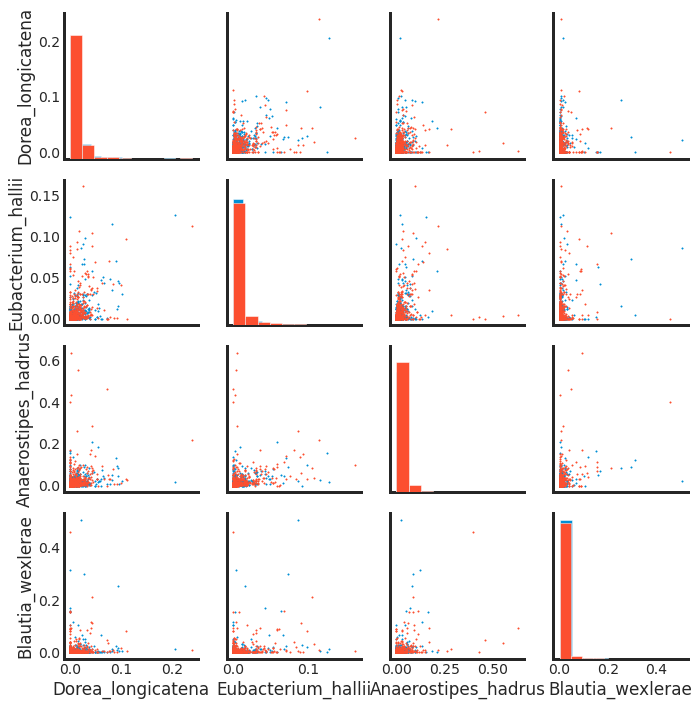

In [124]:
plt.style.use('fivethirtyeight')
sns.set_style("white")

data = pd.read_csv("../../Result/Profile/CRC_HC_species.csv", index_col=False)
data.drop("Unnamed: 0", axis=1, inplace=True)
data = data.set_index("SampleID")

g = sns.PairGrid(data[['Group',
                       'Dorea_longicatena', 
                       'Eubacterium_hallii', 
                       'Anaerostipes_hadrus', 
                       'Blautia_wexlerae']],
                 hue='Group')
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter, s=2)